<a href="https://colab.research.google.com/github/ansiu311/gitto.github.io/blob/main/%EC%BC%80%EC%B0%BD%EB%94%A55%EC%9E%A5_ipynb_%EC%95%88%EC%8B%9C%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 5ms/step - loss: 0.6151 - accuracy: 0.8124 - val_loss: 0.3919 - val_accuracy: 0.8726
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2611 - accuracy: 0.9187 - val_loss: 0.2070 - val_accuracy: 0.9350
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1716 - accuracy: 0.9474 - val_loss: 0.1764 - val_accuracy: 0.9477
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1220 - accuracy: 0.9626 - val_loss: 0.1475 - val_accuracy: 0.9573
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0910 - accuracy: 0.9715 - val_loss: 0.1495 - val_accuracy: 0.9544
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9781 - val_loss: 0.1319 - val_accuracy: 0.9597
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.1208 - val_accuracy: 0.9678
Epoch 

**검증 정확도 비교 그래프 그리기**

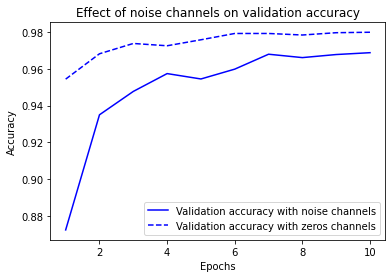

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3153 - accuracy: 0.1055 - val_loss: 2.3071 - val_accuracy: 0.1077
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2987 - accuracy: 0.1184 - val_loss: 2.3124 - val_accuracy: 0.1056
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2908 - accuracy: 0.1272 - val_loss: 2.3199 - val_accuracy: 0.1053
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2776 - accuracy: 0.1393 - val_loss: 2.3252 - val_accuracy: 0.1038
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2621 - accuracy: 0.1536 - val_loss: 2.3376 - val_accuracy: 0.1013
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2418 - accuracy: 0.1665 - val_loss: 2.3463 - val_accuracy: 0.1052
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2174 - accuracy: 0.1817 - val_loss: 2.3629 - val_accuracy: 0.0999

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 535.8927 - accuracy: 0.3389 - val_loss: 2.1323 - val_accuracy: 0.2282
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7904 - accuracy: 0.2102 - val_loss: 2.2556 - val_accuracy: 0.1638
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5985 - accuracy: 0.1703 - val_loss: 2.3178 - val_accuracy: 0.1901
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4236 - accuracy: 0.1710 - val_loss: 2.2387 - val_accuracy: 0.1715
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5123 - accuracy: 0.1917 - val_loss: 6.6701 - val_accuracy: 0.1398
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4462 - accuracy: 0.1909 - val_loss: 2.4511 - val_accuracy: 0.1953
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3864 - accuracy: 0.1966 - val_loss: 2.2178 - val_accuracy: 0.2041
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.9111 - val_loss: 0.1383 - val_accuracy: 0.9607
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1282 - accuracy: 0.9647 - val_loss: 0.1381 - val_accuracy: 0.9657
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1013 - accuracy: 0.9727 - val_loss: 0.1351 - val_accuracy: 0.9711
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9785 - val_loss: 0.1671 - val_accuracy: 0.9714
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9824 - val_loss: 0.1711 - val_accuracy: 0.9691
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0596 - accuracy: 0.9856 - val_loss: 0.1828 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0506 - accuracy: 0.9872 - val_loss: 0.2006 - val_accuracy: 0.9724
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6727 - accuracy: 0.8357 - val_loss: 0.3586 - val_accuracy: 0.9040
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.9023 - val_loss: 0.3101 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.9117 - val_loss: 0.2933 - val_accuracy: 0.9189
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.9160 - val_loss: 0.2842 - val_accuracy: 0.9221
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.9190 - val_loss: 0.2793 - val_accuracy: 0.9208
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.9208 - val_loss: 0.2745 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.9218 - val_loss: 0.2726 - val_accuracy: 0.9249
Epoch 

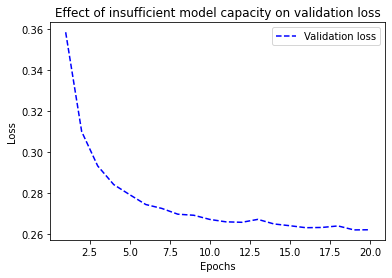

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3760 - accuracy: 0.8929 - val_loss: 0.1905 - val_accuracy: 0.9464
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9506 - val_loss: 0.1489 - val_accuracy: 0.9552
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1185 - accuracy: 0.9642 - val_loss: 0.1221 - val_accuracy: 0.9650
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0907 - accuracy: 0.9719 - val_loss: 0.1014 - val_accuracy: 0.9701
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9782 - val_loss: 0.1017 - val_accuracy: 0.9727
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0895 - val_accuracy: 0.9758
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0945 - val_accuracy: 0.9746
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5689 - accuracy: 0.7659 - val_loss: 0.4528 - val_accuracy: 0.8566
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3804 - accuracy: 0.8783 - val_loss: 0.3567 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2833 - accuracy: 0.9057 - val_loss: 0.2985 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2266 - accuracy: 0.9233 - val_loss: 0.3006 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1876 - accuracy: 0.9357 - val_loss: 0.2793 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1630 - accuracy: 0.9457 - val_loss: 0.2910 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1394 - accurac

**작은 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.6437 - accuracy: 0.6113 - val_loss: 0.5961 - val_accuracy: 0.6353
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5602 - accuracy: 0.7568 - val_loss: 0.5377 - val_accuracy: 0.7979
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5065 - accuracy: 0.8305 - val_loss: 0.5069 - val_accuracy: 0.7985
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4686 - accuracy: 0.8662 - val_loss: 0.4807 - val_accuracy: 0.8529
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4397 - accuracy: 0.8943 - val_loss: 0.4728 - val_accuracy: 0.8321
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4161 - accuracy: 0.9121 - val_loss: 0.4761 - val_accuracy: 0.8236
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3957 - accuracy: 0.9251 - val_loss: 0.4539 - val_accuracy: 0.8576
Epoch 8/20
30

**큰 용량의 모델**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5756 - accuracy: 0.7089 - val_loss: 0.3522 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3281 - accuracy: 0.8635 - val_loss: 0.3002 - val_accuracy: 0.8776
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2429 - accuracy: 0.9033 - val_loss: 0.2744 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1936 - accuracy: 0.9238 - val_loss: 0.2701 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1529 - accuracy: 0.9431 - val_loss: 0.2854 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0995 - accuracy: 0.9658 - val_loss: 0.3468 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1114 - accuracy: 0.9601 - val_loss: 0.2876 - val_accuracy: 0.8824
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6493 - accuracy: 0.7598 - val_loss: 0.5221 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4506 - accuracy: 0.8847 - val_loss: 0.4192 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3624 - accuracy: 0.9106 - val_loss: 0.3938 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3199 - accuracy: 0.9224 - val_loss: 0.3906 - val_accuracy: 0.8736
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2928 - accuracy: 0.9283 - val_loss: 0.3588 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2770 - accuracy: 0.9335 - val_loss: 0.3613 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2653 - accuracy: 0.9392 - val_loss: 0.3657 - val_accuracy: 0.8860
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6467 - accuracy: 0.6159 - val_loss: 0.5353 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5526 - accuracy: 0.7271 - val_loss: 0.4441 - val_accuracy: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4745 - accuracy: 0.7975 - val_loss: 0.3751 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4178 - accuracy: 0.8348 - val_loss: 0.3403 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3588 - accuracy: 0.8684 - val_loss: 0.3016 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3158 - accuracy: 0.8882 - val_loss: 0.2811 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2815 - accuracy: 0.9050 - val_loss: 0.2802 - val_accuracy: 0.8921
Epoch 8/20
30

## 요약